In [1]:
import sys
sys.path.append("..")

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from dataset import *
from midi import *
from similarity import *

In [3]:
def display(score, perf, head, tail) -> None:
    plt.figure(figsize=(16, 9))
    
    plt.subplot(2, 1, 1)
    plt.title("Score")
    plt.imshow(score, cmap="gray", aspect="auto", origin="lower", interpolation="nearest")
    plt.ylabel("MIDI Key")
    plt.xlabel("Frame")
    ylim, _ = score.shape
    plt.ylim([0, ylim])


    plt.subplot(2, 1, 2)
    plt.title("Performance")
    plt.imshow(perf, cmap="gray", aspect="auto", origin="lower", interpolation="nearest")
    plt.ylabel("MIDI Key")
    plt.xlabel("Frame")
    ylim, _ = perf.shape
    plt.vlines(head, 0, ylim, label="head")
    plt.vlines(tail, 0, ylim, label="tail")
    plt.legend()
    plt.ylim([0, ylim])

    plt.show()

In [4]:
generator = new_generator(root="../../dataset/newbie-dataset/", note_scale=0.90, shuffle=False)

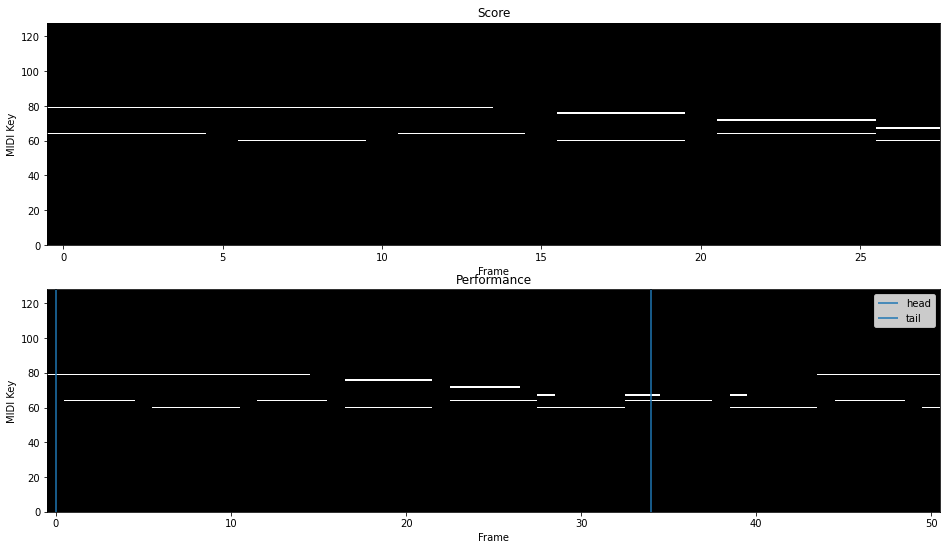

In [5]:
score_matrix, perf_matrix, (original_head, original_tail) = next(generator)
display(score_matrix, perf_matrix, original_head, original_tail)

In [6]:
decay_fn = get_decay_fn("linear", settling_frame=10)
score_seq_list = MIDIUnitSequenceList.from_midi_matrix(score_matrix, decay_fn)
perf_seq_list = MIDIUnitSequenceList.from_midi_matrix(perf_matrix, decay_fn)

In [7]:
score_sequence = score_seq_list.repr_unit_sequence
perf_sequence = perf_seq_list.repr_unit_sequence
original_perf_sequence = perf_seq_list[original_head:original_tail+1].repr_unit_sequence

In [8]:
original_cost, _, _, original_path = global_dtw(score_sequence, original_perf_sequence)
original_path = np.array(original_path)
print(f"{original_cost=}")

original_cost=0.28749445424997294


In [9]:
global_cost, (global_head, global_tail), global_matrix, global_path = global_dtw(score_sequence, perf_sequence)
global_path = np.array(global_path)
print(f"{global_cost=}")

global_cost=0.6351073488299558


In [10]:
subsequence_cost, (subsequence_head, subsequence_tail), subsequence_matrix, subsequence_path = subsequence_dtw(score_sequence, perf_sequence)
subsequence_path = np.array(subsequence_path)
print(f"{subsequence_cost=}")

subsequence_cost=0.03857583749052298


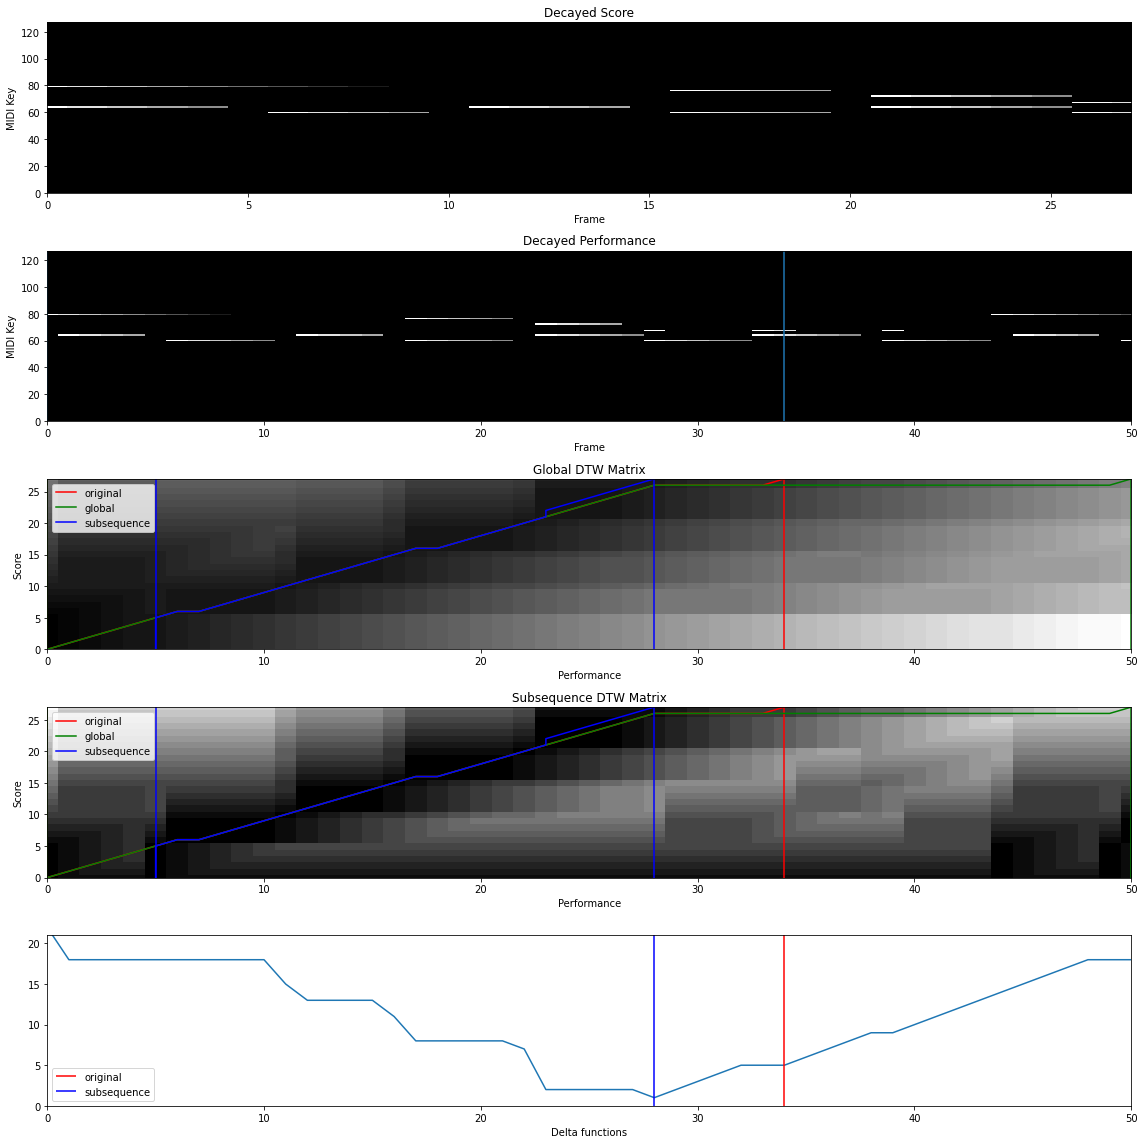

In [20]:
ymax, xmax = global_matrix.shape

plt.figure(figsize=(16,16))

plt.subplot(5, 1, 1)
plt.title("Decayed Score")
decayed_score_matrix = score_seq_list.to_midi_matrix(use_velocity=True)
plt.imshow(decayed_score_matrix, cmap="gray", aspect="auto", origin="lower", interpolation="nearest")
plt.ylabel("MIDI Key")
plt.xlabel("Frame")
plt.ylim([0, 127])
plt.xlim([0, ymax-1])

plt.subplot(5, 1, 2)
plt.title("Decayed Performance")
decayed_perf_matrix = perf_seq_list.to_midi_matrix(use_velocity=True)
plt.imshow(decayed_perf_matrix, cmap="gray", aspect="auto", origin="lower", interpolation="nearest")
plt.ylabel("MIDI Key")
plt.xlabel("Frame")
plt.vlines(original_head, 0, 127)
plt.vlines(original_tail, 0, 127)
plt.ylim([0, 127])
plt.xlim([0, xmax - 1])

plt.subplot(5, 1, 3)
plt.title("Global DTW Matrix")
plt.imshow(global_matrix, cmap="gray", aspect="auto", origin="lower", interpolation="nearest")
plt.vlines(original_head, 0, ymax, "r")
plt.vlines(original_tail, 0, ymax, "r")
plt.plot(original_path[:, 0], original_path[:, 1], "r", label="original")
plt.vlines(global_head, 0, ymax, "g")
plt.vlines(global_tail, 0, ymax, "g")
plt.plot(global_path[:, 0], global_path[:, 1], "g", label="global")
plt.vlines(subsequence_head, 0, ymax, "b")
plt.vlines(subsequence_tail, 0, ymax, "b")
plt.plot(subsequence_path[:, 0], subsequence_path[:, 1], "b", label="subsequence")
plt.ylim([0, ymax - 1])
plt.xlim([0, xmax - 1])
plt.xlabel("Performance")
plt.ylabel("Score")
plt.legend()

plt.subplot(5, 1, 4)
plt.title("Subsequence DTW Matrix")
plt.imshow(subsequence_matrix, cmap="gray", aspect="auto", origin="lower", interpolation="nearest")
plt.vlines(original_head, 0, ymax, "r")
plt.vlines(original_tail, 0, ymax, "r")
plt.plot(original_path[:, 0], original_path[:, 1], "r", label="original")
plt.vlines(global_head, 0, ymax, "g")
plt.vlines(global_tail, 0, ymax, "g")
plt.plot(global_path[:, 0], global_path[:, 1], "g", label="global")
plt.vlines(subsequence_head, 0, ymax, "b")
plt.vlines(subsequence_tail, 0, ymax, "b")
plt.plot(subsequence_path[:, 0], subsequence_path[:, 1], "b", label="subsequence")
plt.ylim([0, ymax - 1])
plt.xlim([0, xmax - 1])
plt.xlabel("Performance")
plt.ylabel("Score")
plt.legend()

plt.subplot(5, 1, 5)
delta_functions = subsequence_matrix[-1, :]
ymax = np.max(delta_functions)
plt.plot(np.arange(0, xmax), subsequence_matrix[-1, :])
plt.vlines(original_tail, 0, ymax, "r", label="original")
plt.vlines(subsequence_tail, 0, ymax, "b", label="subsequence")
plt.legend()
plt.xlim([0, xmax - 1])
plt.ylim([0, ymax - 1])
plt.xlabel("Delta functions")

plt.tight_layout()
plt.show()